# Video Game Market Study

The purpose of this study is to find profitable markets for new video games.  According to
market research firm, Newzoo, the video game market accounts for approximately 100 billion in revenue today.
The market is expected to reach 118.6 billion by 2019.

Newzoo reports that Asia accounted for 47% of the market in 2016, and is expected to account for 57% of
growth in upcoming years.  

The data sample used in this study comes from Kaggle, and explores the console video game market from 1980
through early 2017.  The data includes game categories ("genres"), game platforms, sales volumes as well as 
critic and user scores.

Our data set does not include the mobile game market which Newzoo recognizes as a smaller but growing market
relative to the console game market data set we are using.

This capstone will attempt to answer three questions:
    1. What video game genres are most popular?
    2. What platforms are the most popluar?
    3. Are there disrcepancies between genres and platforms indicating potentially underserved markets?


In [263]:
import pandas as pd
df = pd.read_csv('/users/bentonmaples/downloads/Video_Games_Sales_as_at_22_Dec_2016.csv')
import matplotlib.pyplot as plt
import numpy as np


# SECTION 1 - OVERVIEW OF DATASET

This section will take an overview of the data set and assure quality.

In [242]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Comments:

There is a great deal of missing data in the critic/user comments fields, but we are not using those fields
for now.  The main fields we will use for this study seem to have robust data.

A decsription of the data:

In [323]:
# Describe data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000



The data description shows some games have improper dates.  We see in the max category that there
are sales registered for games with Year_of_Release at 2020, which is in the future.  So some
of that data must be erroneous.

We can also see that the standard of deviation in sales is higher in North America that in the 
global market.  This suggests a wider gap between successful and unssuccessful games in North
America compared to other markets.  This is further confirmed with top 25% of games accounting
for 3 times the sales volume of bottom 75% in North America, whereas globally the top 25%
has sold just under twice as much as bottom 75%.

Let us do a sanity check and plot the number of Game releases per year to visualize our data
and see of the bad ranges on Year_of_Release reveal a significant problem with our data set.


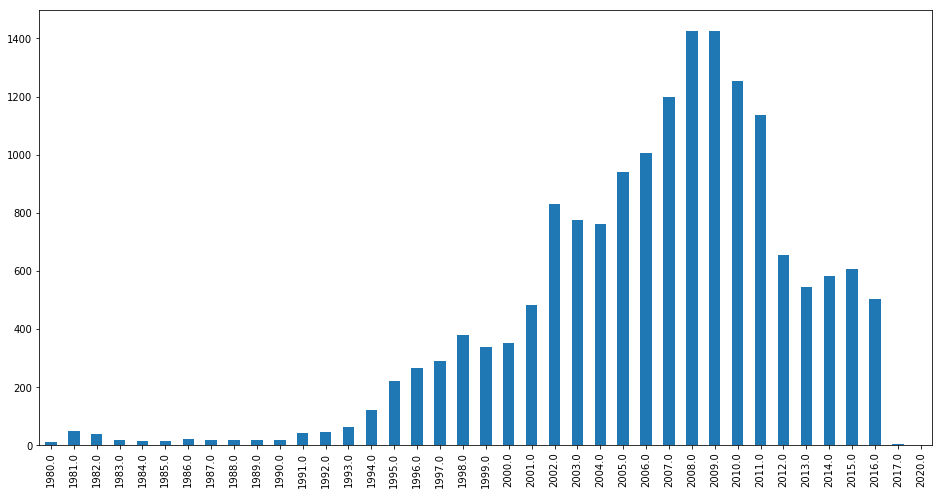

In [325]:

yaxis = df.Year_of_Release.value_counts(sort=False)

yaxis.sort_index(ascending=True, inplace=True)

yaxis.plot(kind="bar", sort_columns=True, figsize = (16,8))

plt.show()

There is only a tiny portion of the sample that shows Year_of_Release in 2020, and that is the only year
in the future.  Otherwise, the ditribition suggests the data set provides a good overview of the market
from over the past 20 years up to 2016.

# SECTION 2 - Asnwering Questions

1. What video game genres are most popular?

2. What platforms are various genres most popular on?

3. Are there anomolies where a particular genre is underserved on a particular platform?

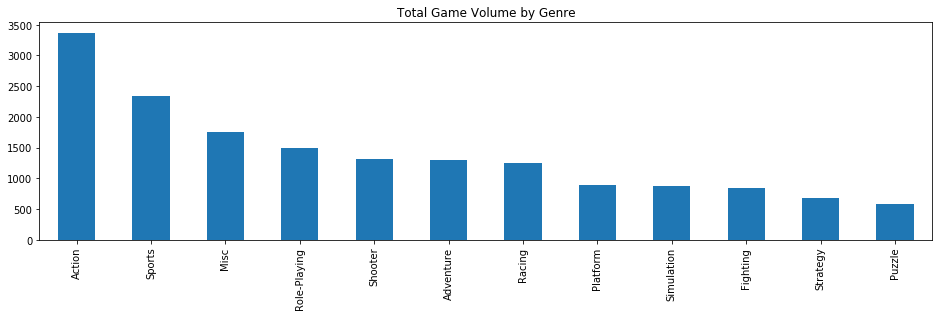

In [226]:
# We will now look at total number of games produced by genre

yaxis = df.Genre.value_counts()

yaxis.plot(kind="bar", figsize = (16,4))
plt.title('Total Game Volume by Genre - All Time')
plt.show()


The graph above provides an asnwer to our first question and reveals which game categories are the most popular
since the data set begins in 1980.

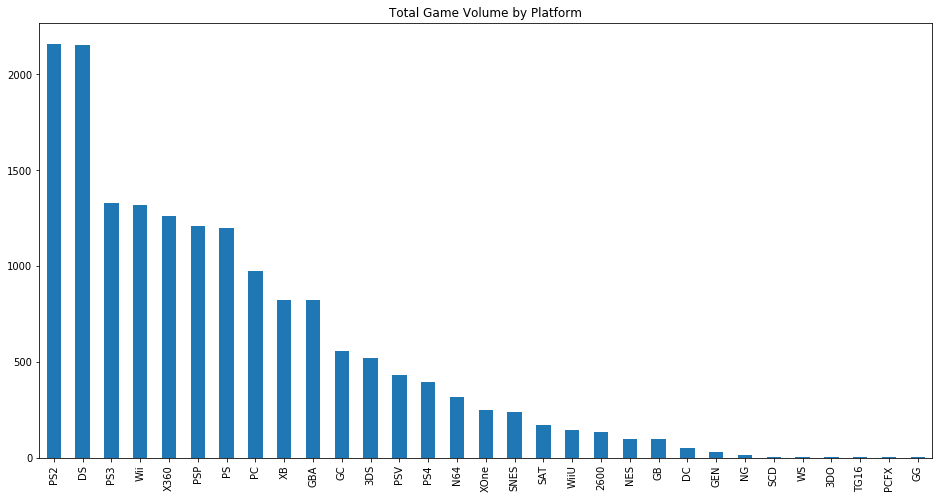

In [227]:
# We will look at total game volume by platform

yaxis = df.Platform.value_counts()

yaxis.plot(kind="bar", figsize = (16,8))
plt.title('Total Game Volume by Platform - All Time')
plt.show()


The graph above gives us an answer to question 2, and reveals overall popularity of platforms since the data set
began in 1980.

Let us dive further into questions 1 and 2 and discover how the markets might have changed, and which genres
and platforms have seen the most games produced in recent years.

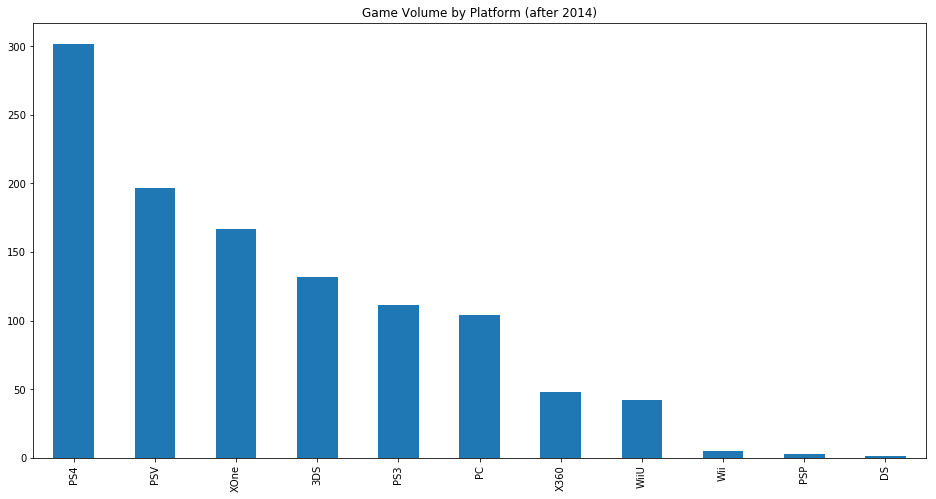

In [229]:
df2 = df[df['Year_of_Release']>2014]

yaxis = df2.Platform.value_counts()

yaxis.plot(kind="bar", figsize = (16,8))
plt.title('Game Volume by Platform (since 2014)')
plt.show()

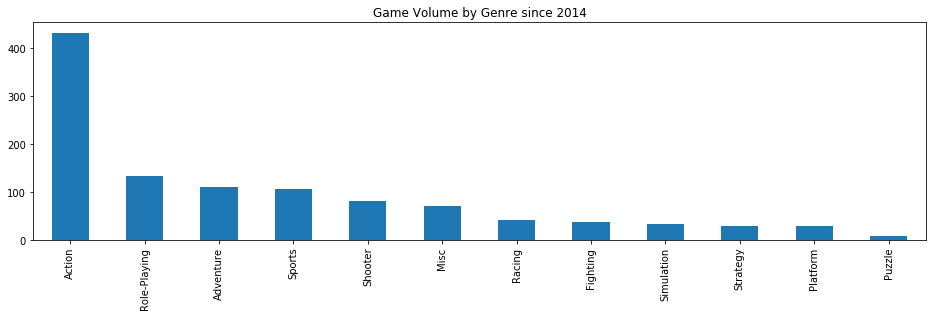

In [230]:
# And let us look at recent game volume by genre

yaxis = df2.Genre.value_counts()

yaxis.plot(kind="bar", figsize = (16,4))
plt.title('Game Volume by Genre since 2014')
plt.show()

Additional exploration of questions 1 and 2 have revealed changes in recent trends vs. trends over the entire
time span.

Since 2014, role-playing and adventure games have seen more games produced than they historically have.  We have
8 platforms that continue to see sales since 2014.  

We now see some discrepancies between historic popularity and recent trends which gives us a window into
possible data anomolies. This allows us to explore question 3, and attempt to identify game platforms
that might be overserved or underserved for a particular genre.

We will now look specficially into these two genres to discover if role-playing or adventure games
are under or overrepresented on various platforms in recent years.

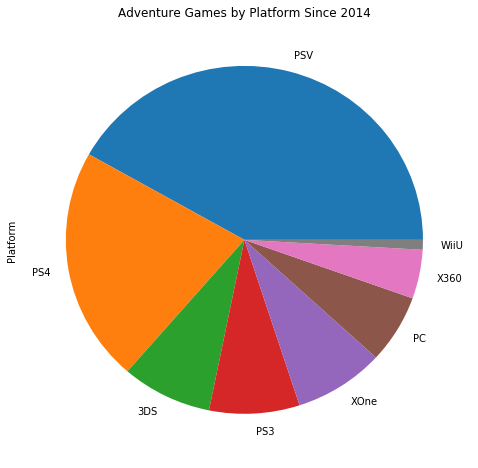

In [331]:
df3 = df[df['Year_of_Release']>2014]
df4 = df3[df3['Genre']=='Adventure']


yaxis = df4.Platform.value_counts()

yaxis.plot(kind="pie", figsize = (8,8))
plt.title('Adventure Games by Platform Since 2014')
plt.show()

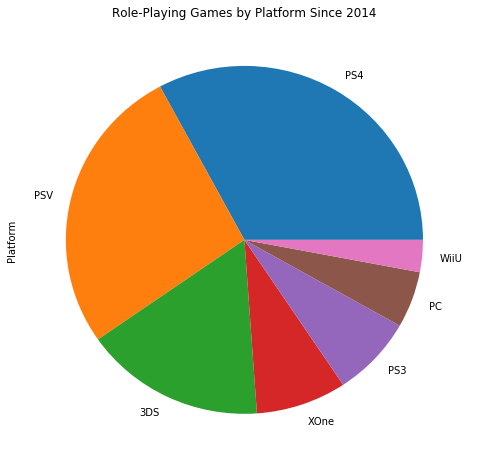

In [332]:
df5 = df3[df3['Genre']=='Role-Playing']

yaxis = df5.Platform.value_counts()

yaxis.plot(kind="pie", figsize = (8,8))
plt.title('Role-Playing Games by Platform Since 2014')
plt.show()

We see that adventure games have an unusually high occurance on the PSV platform, while role-playing
games have an unusually high occurance on the PS4 platform.  PS4 is the best selling platform, with 
PSV the runner up.  Overall, there is nothing unusual about the distribution of role-playing games
on platforms since 2014 compared to overall games on the platforms.

However, it is unusual that such a high percentage of adventure games are being produced on the PSV platform.
This suggests it might be worth examining the adventure category on the PSV in detail to discover why
an overabundance of adventure titles have appeared on that platform since 2014.

It would be beneficial to have a model that could project approximate success of a given game
on a given platform, but this is not possible with my existing skill set.


# SECTION 3 - Proposed Research

Finding trends in this data that could lend thmselves to finding good product categories for new
game releases is challenging given my limited skill set.

It seems that what is really needed is a predictive model that will project how well a given game
in a given category released by a given manufacturer would be expected to perform.  In order to achieve
this, I believe it would require machine learning and regression techniques.  Additionally I expect 
it would require an analysis of games that are part of a franchise (i.e. Call of Duty) vs. those that
are not. 

Ideally a sophisticated model like this could project sales volume for a given category on a given platform
for a new or existing manufacturer, thereby revealing best markets for new video game opportunities.